# **Cinemática de un robot planar**

**Docente:** PhD Jorge Rudas

**Diseño de prototipos - 2025 I**

**INFOTEP**

## Importar librerias

In [74]:
import numpy as np
from sympy import*
init_printing()

## Se crean variables simbólicas

In [75]:
## Variables Simbolicas
theta_1 = symbols("theta_1",  real=True)
theta_2 = symbols("theta_2",  real=True)
l_1 = symbols("l_1",  real=True)
l_2 = symbols("l_2",  real=True)

## Transformación desde el estado 0 al estado 1

In [76]:
_0H1 = Matrix([[cos(theta_1), -sin(theta_1), 0, 0], [sin(theta_1), cos(theta_1), 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

In [77]:
_0H1


⎡cos(θ₁)  -sin(θ₁)  0  0⎤
⎢                       ⎥
⎢sin(θ₁)  cos(θ₁)   0  0⎥
⎢                       ⎥
⎢   0        0      1  0⎥
⎢                       ⎥
⎣   0        0      0  1⎦

## Transformación desde el estado 1 al estado 2

In [78]:
_1H2 = Matrix([[1, 0, 0, l_1], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

In [79]:
_1H2

⎡1  0  0  l₁⎤
⎢           ⎥
⎢0  1  0  0 ⎥
⎢           ⎥
⎢0  0  1  0 ⎥
⎢           ⎥
⎣0  0  0  1 ⎦

## Transformación desde el estado 2 al estado 3

In [80]:
_2H3 = Matrix([[cos(theta_2), -sin(theta_2), 0, 0], [sin(theta_2), cos(theta_2), 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

In [81]:
_2H3

⎡cos(θ₂)  -sin(θ₂)  0  0⎤
⎢                       ⎥
⎢sin(θ₂)  cos(θ₂)   0  0⎥
⎢                       ⎥
⎢   0        0      1  0⎥
⎢                       ⎥
⎣   0        0      0  1⎦

## Transformación desde el estado 3 al estado 4

In [82]:
_3H4 = Matrix([[1, 0, 0, l_2], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

In [83]:
_3H4


⎡1  0  0  l₂⎤
⎢           ⎥
⎢0  1  0  0 ⎥
⎢           ⎥
⎢0  0  1  0 ⎥
⎢           ⎥
⎣0  0  0  1 ⎦

## Composición de cada estado de la cinemática

In [84]:
H = simplify(_0H1@_1H2@_2H3@_3H4)

In [85]:
H

⎡cos(θ₁ + θ₂)  -sin(θ₁ + θ₂)  0  l₁⋅cos(θ₁) + l₂⋅cos(θ₁ + θ₂)⎤
⎢                                                            ⎥
⎢sin(θ₁ + θ₂)  cos(θ₁ + θ₂)   0  l₁⋅sin(θ₁) + l₂⋅sin(θ₁ + θ₂)⎥
⎢                                                            ⎥
⎢     0              0        1               0              ⎥
⎢                                                            ⎥
⎣     0              0        0               1              ⎦

## Posición del efector final

In [86]:
P = H[0:2, 3]

In [87]:
P

⎡l₁⋅cos(θ₁) + l₂⋅cos(θ₁ + θ₂)⎤
⎢                            ⎥
⎣l₁⋅sin(θ₁) + l₂⋅sin(θ₁ + θ₂)⎦

In [88]:
import matplotlib.pyplot as plt
import numpy as np

def dibujar_brazo_mecanico(theta1, theta2, l1, l2):
  """Función para dibujar un brazo mecanico con 2 grados de libertad.

  Parametros:
    theta1: Angulo de la primera articulacion en radianes.
    theta2: Angulo de la segunda articulacion en radianes.
    l1: Longitud del primer extremo
    l2: Longitud del segundo extremo
  """

 # Calculamos la posición del efector final
  x1 = l1 * np.cos(theta1)
  y1 = l1 * np.sin(theta1)
  x2 = x1 + l2 * np.cos(theta1 + theta2)
  y2 = y1 + l2 * np.sin(theta1 + theta2)

# Dibujando el brazo con lineas y puntos
  plt.figure(figsize=(6, 6))
  plt.plot([0, x1], [0, y1], 'b-', linewidth=5)  # First link
  plt.plot([x1, x2], [y1, y2], 'b-', linewidth=5)  # Second link
  plt.plot(0, 0, 'ro', markersize=10)  # Base
  plt.plot(x2, y2, 'go', markersize=10)  # End-effector

  plt.plot(-1, 1, 'mo', markersize=10)  # Punto que queremos alcanzar

  # Se dibujan los límites y los labels
  plt.xlim([-l1 - l2, l1 + l2])
  plt.ylim([-l1 - l2, l1 + l2])
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title('Brazo robótico')
  plt.grid(True)
  plt.show()

## Ejemplo de manipulación del brazo robotico en su estado final

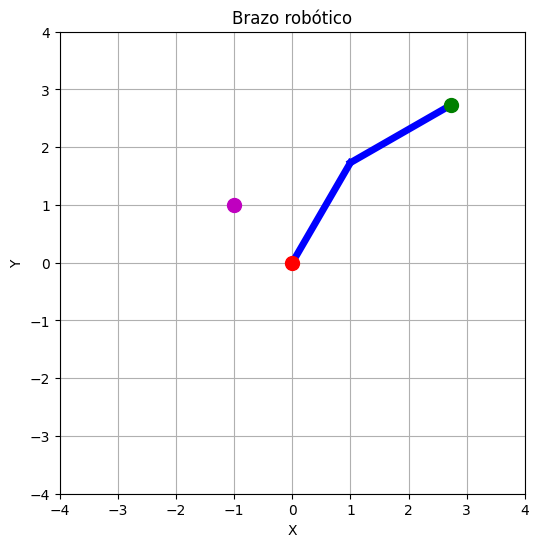

In [97]:
theta1 = np.deg2rad(60)
theta2 = np.deg2rad(-30)
l1 = 2
l2 = 2
dibujar_brazo_mecanico(theta1, theta2, l1, l2)

## **Taller**

*  Dibujar cada estado del anterior brazo robótico
*  Imagine un brazo robótico cuyas extremidades miden 2 unidades cada una. Podría este brazo alcanzar cualquier objeto dentro de la cuadricula de 2 x 2? Explique detalladamente su razonamiento

**Primer estado**

In [90]:
def dibujar_brazo_mecanico1(theta1, l1, l2):
  """Función para dibujar un brazo mecanico con 2 grados de libertad.

  Parametros:
    theta1: Angulo de la primera articulacion en radianes.
    l1: Longitud del primer extremo
    l2: Longitud del segundo extremo
  """

  #Codigo por mi
  x1 = l1 * np.cos(theta1)
  y1 = l1 * np.sin(theta1)
  x2 = x1 + l2 * np.cos(theta1)
  y2 = y1 * np.sin(theta1)

  plt.figure(figsize=(6, 6))
  plt.plot([0, x1], [0, y1], 'b-', linewidth=5)  # First link
  plt.plot([x1, x2], [y1, y2], 'b-', linewidth=5)  # Second link
  plt.plot(0, 0, 'ro', markersize=10)  # Base
  plt.plot(x2, y2, 'go', markersize=10)  # End-effector

  # Se dibujan los límites y los labels
  plt.xlim([-l1 - l2, l1 + l2])
  plt.ylim([-l1 - l2, l1 + l2])
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title('Brazo robótico')
  plt.grid(True)
  plt.show()

# *Primer estado, solo movimiento del brazo.*

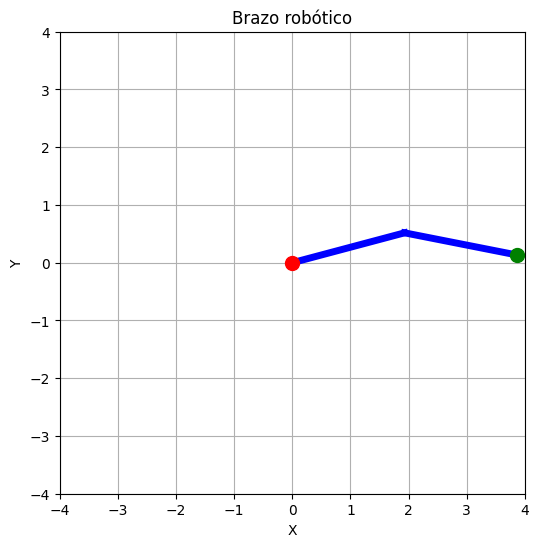

In [91]:
"""
Se definen parámetros:
    theta1: Ángulo de la primera articulación en 15° (convertido a radianes)
    l1: Longitud del primer brazo (2 unidades)
    l2: Longitud del segundo brazo (2 unidades)
"""
theta1 = np.deg2rad(15)  # 45 grados
#theta2 = np.deg2rad(0)  # 0 grados
l1 = 2
l2 = 2
dibujar_brazo_mecanico1(theta1, l1, l2)

# *Segundo estado, movimiento del antebrazo y brazo.*

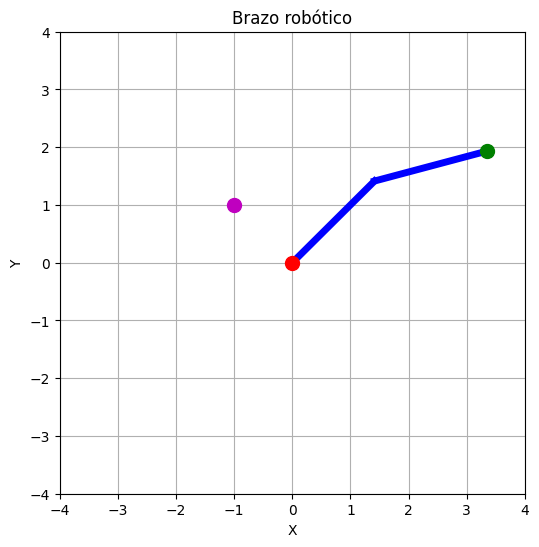

In [92]:
"""
Se definen parámetros:
    theta1: Ángulo de la primera articulación en 45° (convertido a radianes)
    theta2: Ángulo de la segunda articulación en -30° (convertido a radianes)
    l1: Longitud del primer brazo (2 unidades)
    l2: Longitud del segundo brazo (2 unidades)
"""
theta1 = np.deg2rad(45)
theta2 = np.deg2rad(-30)
l1 = 2
l2 = 2
dibujar_brazo_mecanico(theta1, theta2, l1, l2)

# **Se realizaron diferentes pruebas del alcance dentro de su largo total en diferentes puntos. El punto Morado representa el punto que queremos alcanzar**

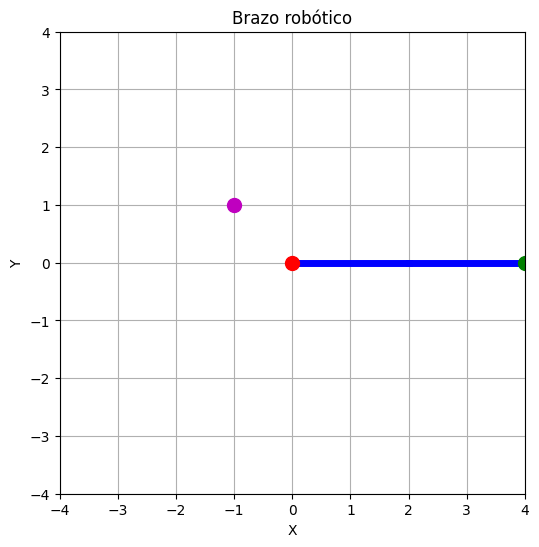

In [93]:
"""
Se definen parámetros estado Inicial:
    theta1: Ángulo de la primera articulación en 0° (convertido a radianes)
    theta2: Ángulo de la segunda articulación en 0° (convertido a radianes)
    l1: Longitud del primer brazo (2 unidades)
    l2: Longitud del segundo brazo (2 unidades)
"""
#Antes de alanzar el punto.
theta1 = np.deg2rad(0)
theta2 = np.deg2rad(0)
l1 = 2
l2 = 2
dibujar_brazo_mecanico(theta1, theta2, l1, l2)

**Alcance del punto morado en ubicacion (-1, 1)**

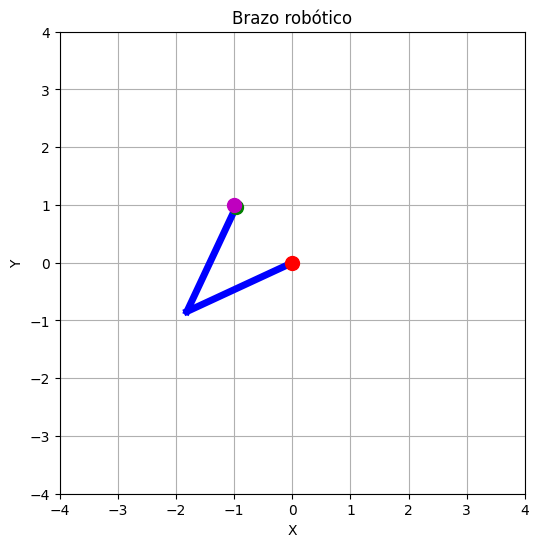

In [94]:
"""
Se definen parámetros:
    theta1: Ángulo de la primera articulación en 205° (convertido a radianes)
    theta2: Ángulo de la segunda articulación en -140° (convertido a radianes)
    l1: Longitud del primer brazo (2 unidades)
    l2: Longitud del segundo brazo (2 unidades)
"""
theta1 = np.deg2rad(205)
theta2 = np.deg2rad(-140)
l1 = 2
l2 = 2
dibujar_brazo_mecanico(theta1, theta2, l1, l2)

Segun investigaciones que realizamos, el alcance máximo de un robot planar esta dada por la suma de las longitudes de sus brazos, en este caso 2 + 2 = 4 unidades.

La cuadricula que nos piden alcanzar los puntos es de 2x2 por logica es evidente que puede alcancar cada punto, pero matematicamente se puede comprobar sacando la diagonal del plano, quedaria √(2² + 2²) = √8 = 2.83 unidades, que es menor que 4, por ende si alcaza todos los puntos del plano 2 x 2 ya que el radio del robot es de 4.



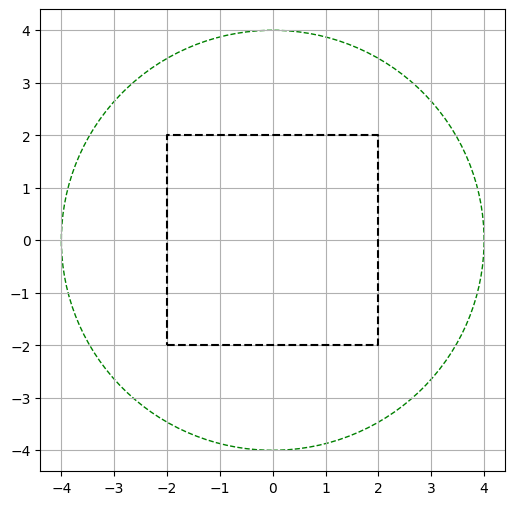

In [96]:
def alcance():
  """
  Función para dibujar el alcance del robot.
    circle = Representa el radio del circulo o el area que puede alcanzar el robot con l1 = 2 y L2 = 2
    plt.plot([-2, 2, 2, -2, -2], [-2, -2, 2, 2, -2], 'k--') = Representa el plano 2x2 que se encuentra dentro de los parametros del radio de los brazos del robot

  """
  plt.figure(figsize=(6, 6))
  #Representa el radio del circulo o el area que puede alcanzar el robot con l1 = 2 y L2 = 2
  circle = plt.Circle((0, 0), 4, color='g', fill=False, linestyle='--')
  plt.gca().add_patch(circle)
  #Representa el plano 2x2 que se encuentra dentro de los parametros del radio de los brazos del robot
  plt.plot([-2, 2, 2, -2, -2], [-2, -2, 2, 2, -2], 'k--')
  plt.grid(True)
alcance()